# **Scientific Computing - AOL: Case Study**


You are working as a Data Scientist in EGIER, an outdoor equipment manufacturer in Bandung. As a Data Scientist, you have been tasked with processing some data on EGIER warehouse capacity. You are given a set of data that consist of the monthly production of a certain type of bag they produced. The data span from January 2018 to December 2023 is given as M1 to M144. Your supervisor has given you a series of task that needs to be done on the data, as a part or your job



**Problem 1**

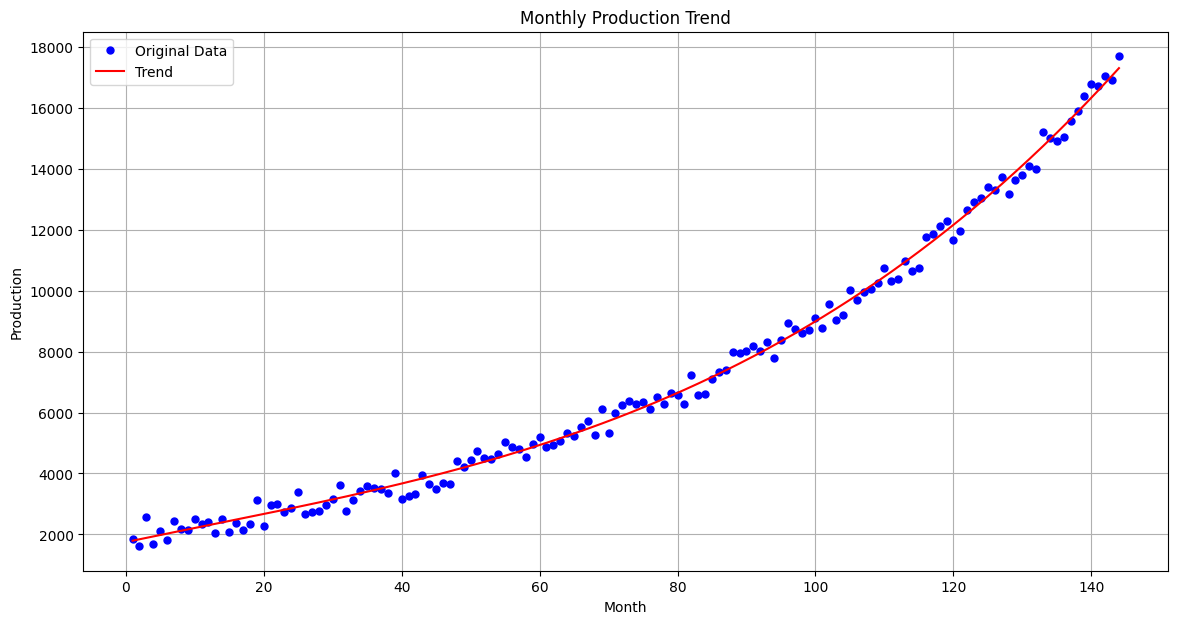

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data
data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277,
    2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175,
    3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
    6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098,
    8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917,
    15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689
]

# Create a dataframe
months = np.arange(1, len(data) + 1)
df = pd.DataFrame({'Month': months, 'Production': data})

# Degree of the polynomial
degree = 3

# Create the design matrix (Vandermonde matrix)
X = np.vander(months, N=degree+1, increasing=True)

# Compute the polynomial coefficients using the least squares method
coefficients = np.linalg.lstsq(X, data, rcond=None)[0]

# Predict the trend using the polynomial coefficients
trend = X.dot(coefficients)

# Plot the original data and the trend
plt.figure(figsize=(14, 7))
# plt.plot(df['Month'], df['Production'], label='Original Data', color='blue')
plt.plot(df['Month'], df['Production'], marker='o', markersize=5, linestyle='None', label='Original Data', color='blue')
plt.plot(df['Month'], trend, label='Trend', color='red', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Monthly Production Trend')
plt.legend()
plt.grid()
plt.show()

**Problem 2**

In [ ]:
import numpy as np

# Sample data
data = np.array([
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129,
    2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376,
    4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789,
    4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118,
    6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368,
    8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986,
    10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808,
    14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689])

# Generate the corresponding x values (months)
months = np.arange(1, len(data) + 1)

# Fit a polynomial of degree 3 (cubic polynomial)
coefficients = np.polyfit(months, data, deg=3)

# Print the coefficients to get the polynomial equation
print(f"Coefficients (from highest degree to lowest): {coefficients}")

# Reverse coefficients to match traditional polynomial form: a3*x^3 + a2*x^2 + a1*x + a0
a3, a2, a1, a0 = coefficients

# Construct the polynomial equation
equation = f"{a3:.5f} * x^3 + {a2:.3f} * x^2 + {a1:.3f} * x + {a0:.3f}"
print(f"Polynomial Equation: {equation}")

Coefficients (from highest degree to lowest): [ 3.86326992e-03 -1.34357030e-01  4.72235525e+01  1.74850672e+03]
Polynomial Equation: 0.00386 * x^3 + -0.134 * x^2 + 47.224 * x + 1748.507


**Problem 3**

In [ ]:
import numpy as np
import math as mt

# Function definition
def f(x):
    return 0.0039 * x**3 - 0.1344 * x**2 + 47.2236 * x + 1748.5067 - 25000

def g(x):  # Derivatives
    return 0.0039 * 3 * x**2 - 0.1344 * 2 * x + 47.2236

# Newton-Raphson method
def Newton_Raphson(x0, error = 0.001, max_iterations = 25):
    for i in range(max_iterations):
        x1 = x0 - (f(x0)/g(x0))

        if(np.abs(f(x1)) < error):
            print(f"Start building at month: {mt.ceil(x1 - 13)}")
            return
        x0 = x1

# Initial guess
initial_guess = 1

# Applying Newton-Raphson method
Newton_Raphson(initial_guess)

Start building at month: 157
